# Prediction using Unsupervised Machine Learning on Iris Dataset | TASK 2

## Data Science & Business Analytics

## The Sparks Foundation GRIP MAY 2021

## Task 2-
#### From the 'Iris' dataset, predict the optimum number of clusters and represent it visually.

## KMeans:
#### Kmeans algorithm is an iterative algorithm that tries to partition the dataset into 'K' pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.

## Author: Rakshit Saxena

In [1]:
##Importing all the useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.head()) # See the first 5 rows

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


#### FINDING THE OPTIMUM NUMBER OF CLUSTERS (K) USING THE ELBOW METHOD

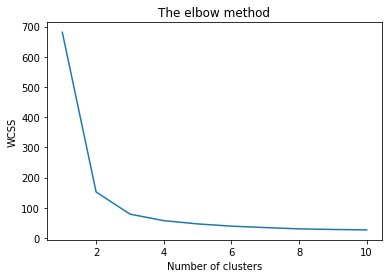

In [4]:
# Finding the optimum number of clusters for k-means classification
# [0,1,2,3] presents the columns, (sepal length, sepal width, petal length and petal width)

x = iris_df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# Allows us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**Here we can observe that the optimal number of clusters is 3 because there is an 'Elbow cut' at 3 on X-axis, therefore, K=3**

#### NOW WE WILL CREATE THE KMEANS CLASSIFIER

In [5]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [6]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


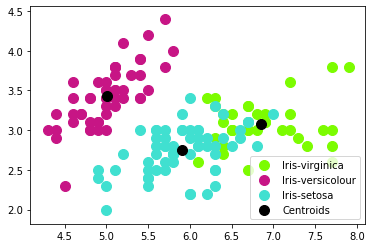

In [7]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'lawngreen', label = 'Iris-virginica')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'mediumvioletred', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'turquoise', label = 'Iris-setosa')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

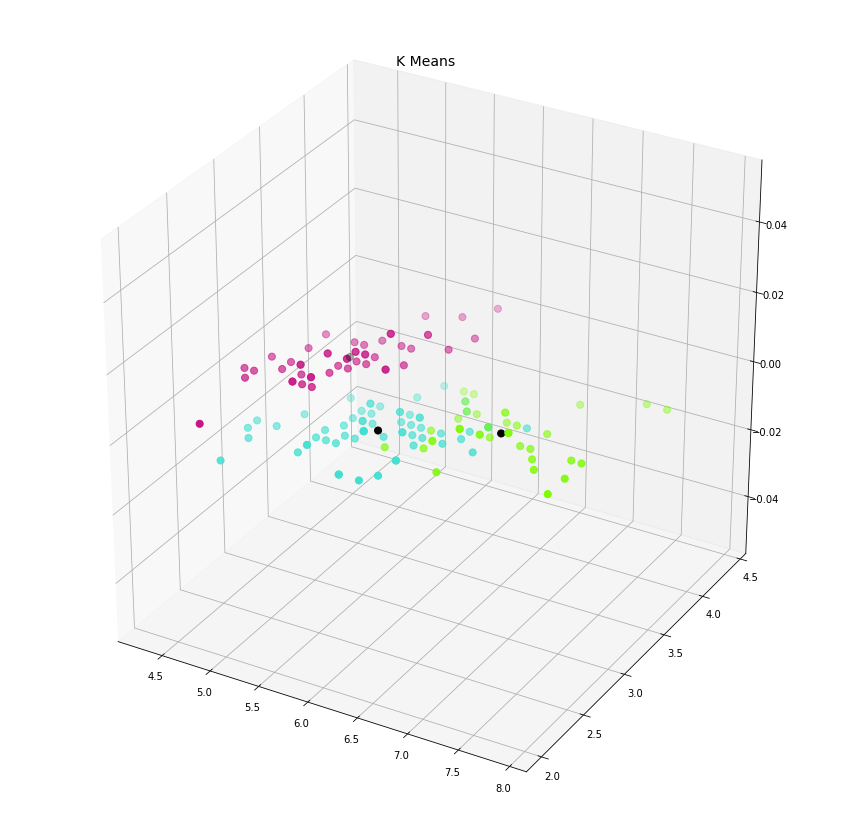

In [10]:
#3D scatterplot using matplotlib library

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'lawngreen', label = 'Iris-virginica')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'mediumvioletred', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'turquoise', label = 'Iris-setosa')
plt.title("K Means", fontsize=14)

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')
plt.show()

#### LABELING THE PREDICTIONS


In [13]:
#1 Corresponds to 'Iris-setosa'
#2 to 'Iris-versicolour'
#0 to 'Iris-virginica'
y_kmeans = np.where(y_kmeans=='1', 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='0', 'Iris-virginica', y_kmeans)

#### Add the prediction to the dataset

In [14]:
data_with_clusters = iris_df.copy()
data_with_clusters["Species"] = y_kmeans
print(data_with_clusters.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

       Species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


#### BAR-PLOT

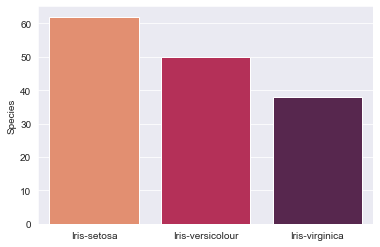

In [15]:
# Bar plot
import seaborn as sns
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Species"] .unique(),
            y = data_with_clusters["Species"] .value_counts(),
            palette="rocket_r");

#### LINE-PLOT

##### Sepal Length vs Sepal Width

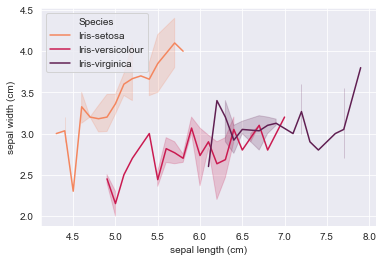

In [16]:
sns.lineplot(x=data_with_clusters.iloc[:,0], y=data_with_clusters.iloc[:,1],
             hue="Species",
             data=data_with_clusters, palette="rocket_r")

##### Petal Length vs Petal Width

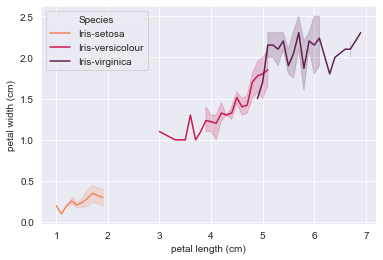

In [17]:
sns.lineplot(x=data_with_clusters.iloc[:,2], y=data_with_clusters.iloc[:,3],
             hue="Species",
             data=data_with_clusters, palette="rocket_r")

##### From above two lineplots it can be inferred that, 
##### The Iris Setosa type of Iris usually has 
1. **Sepal length** ranging from *4.25 cm to 5.75 cm*
2. **Sepal width** ranging from *2.25 cm to 4.15 cm*
3. **Petal length** ranging from *1 cm to 1.85 cm*
4. **Petal width** ranging from *0.15 cm to 0.38 cm*

##### The Iris Versicolour type of iris usually has 
1. **Sepal length** ranging from *4.75 cm to 7 cm*
2. **Sepal width** ranging from *2.45 cm to 3.2 cm*
3. **Petal length** ranging from *3 cm to 5.3 cm*
4. **Petal width** ranging from *1.1 cm to 1.75 cm*

##### The Iris Virginica type of iris usually has 
1. **Sepal length** ranging from *6.1 cm to 7.8 cm*
2. **Sepal width** ranging from *2.55 cm to 3.7 cm*
3. **Petal length** ranging from *4.8 cm to 6.9 cm*
4. **Petal width** ranging from *1.5 cm to 2.35 cm*

#### VIOLIN-PLOT

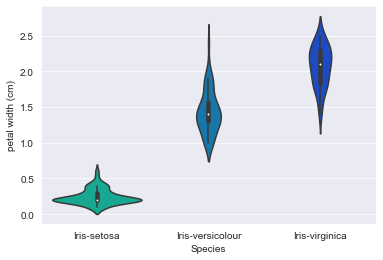

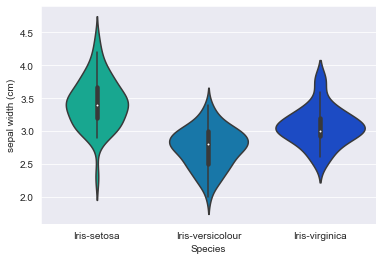

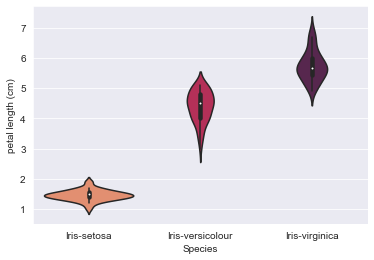

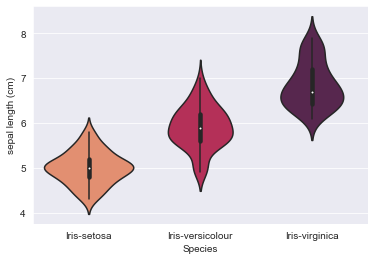

In [21]:
sns.violinplot(x="Species",y="petal width (cm)",data=data_with_clusters, palette="winter_r")
plt.show()
sns.violinplot(x="Species",y="sepal width (cm)",data=data_with_clusters, palette="winter_r")
plt.show()
sns.violinplot(x="Species",y="petal length (cm)",data=data_with_clusters, palette="rocket_r")
plt.show()
sns.violinplot(x="Species",y="sepal length (cm)",data=data_with_clusters, palette="rocket_r")
plt.show()

#### PAIR-PLOT

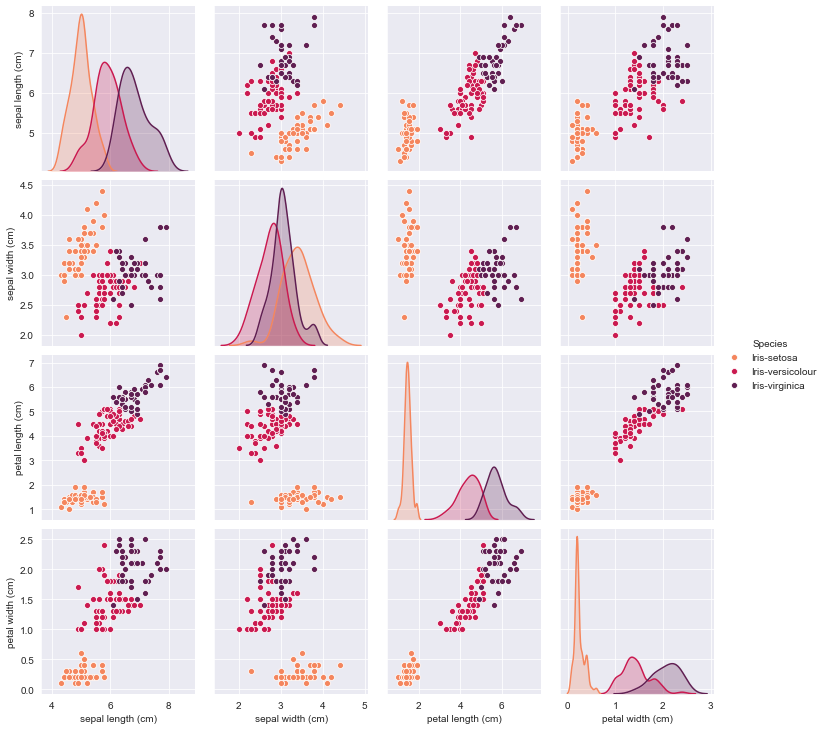

In [22]:
sns.set_style('darkgrid')   # Set grid style
sns.pairplot(data_with_clusters,hue = 'Species', palette="rocket_r"); 

1.   Iris-Setosa, in general, has smaller petal length and petal width as compared to others.
2.   In conclusion, it seems that Iris-Setosa has smaller dimensions than other flowers.

# Thank you.